<a href="https://colab.research.google.com/github/youssefmohamed0/YOLOv8-shape-detection-model/blob/main/shape_detection_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\>>>FIRST UPLOAD DATASET ZIP FILE INTO RUNTIME FOLDER (/content)<<<


In [1]:
!unzip /content/object-detection.v2i.yolov8.zip  #unzip the dataset zip file

Archive:  /content/object-detection.v2i.yolov8.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/1677635654310_png.rf.a893e3c19957df3aba3a9077cd48721a.jpg  
 extracting: test/images/1677635675455_png.rf.12b84f5a2915759702656e0e4d675ed4.jpg  
 extracting: test/images/185941_png.rf.62b149ebbc29e0af7249eb0c02c9c119.jpg  
 extracting: test/images/270-2706860_some-objects-are-rectangles-like-these-ones-flat_png.rf.a8ef28d92ae4025addee2a162235491d.jpg  
 extracting: test/images/2d-basic-shapes-collection-set-260nw-1931448800_jpg.rf.ceaff3b8543c2d14a47ddef593860c3c.jpg  
 extracting: test/images/954c7e0dd9dc7d55ad461878fba312a7_png.rf.a88f34b9b51a28a6cbf844639929b5f0.jpg  
 extracting: test/images/pngtree-set-vector-of-2d-basic-geometrical-shapes-fill-color-png-image_4384378_png.rf.4313deafcc0792f5e236a3c24b18f389.jpg  
 extracting: test/images/round-04-en_

import necessary libraries

In [2]:
!pip install ultralytics==8.0.20
import ultralytics
from ultralytics import YOLO
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.8/224.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.9 MB/s eta 0:00:00


In [3]:
model=YOLO("yolov8s.pt")      #using a custom yolo version 8 model
result=model.train(data="data.yaml",epochs=50,device=0)     #training the model with the data
                                                            #set device=0 to use gpu for much faster training

100%|██████████| 21.5M/21.5M [00:00<00:00, 138MB/s] 

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=

In [ ]:
# model=YOLO("/content/runs/detect/train/weights/last.pt")      #a resume cell incase the previous cell fails midway
# results = model.train(resume=True)

In [4]:
model=YOLO("/content/runs/detect/train/weights/best.pt")      #validation porocess
result=model.val(data="data.yaml")

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/valid/labels.cache... 32 images, 0 backgrounds, 0 corrupt: 100%|██████████| 32/32 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 23, len(boxes) = 75. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]
                   all         32         75      0.666      0.778      0.737      0.587
                circle         32         17      0.592      0.353      0.354      0.256
                 cross         32          3      0.613          1      0.995      0.704
               hexagon         32    

testing the model with sample images provided within the dataset

In [8]:
model=YOLO("/content/runs/detect/train/weights/best.pt")
result=model.predict(source="/content/test/images",save=True)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs
Results saved to runs/detect/predict


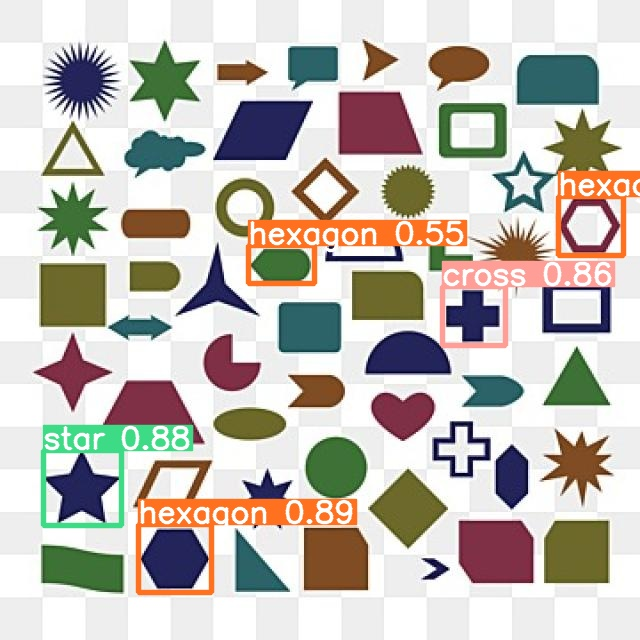

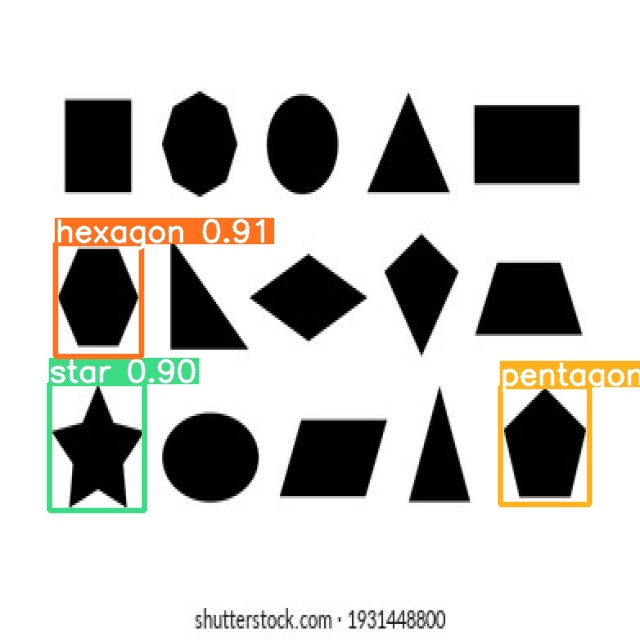

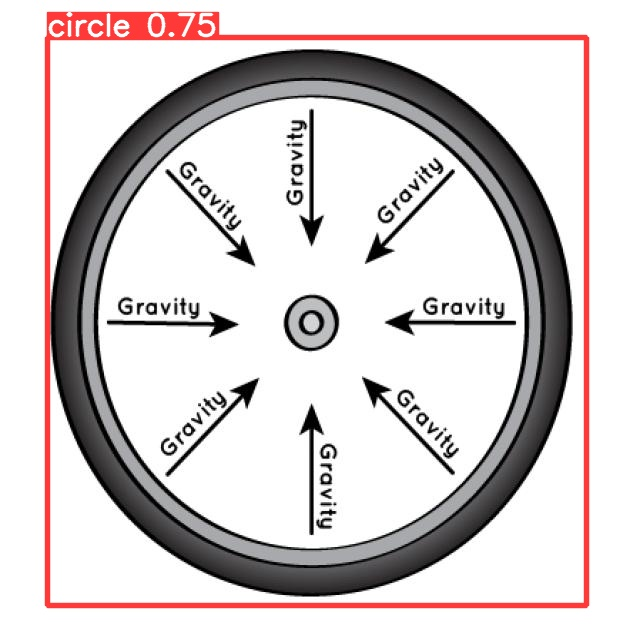

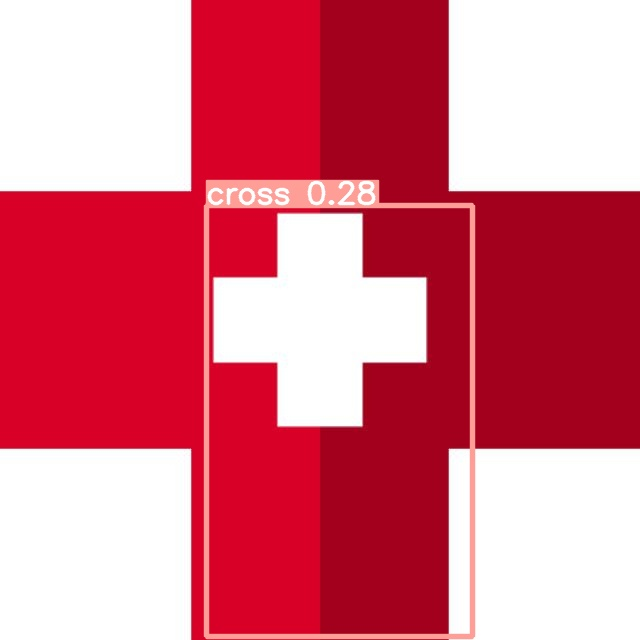

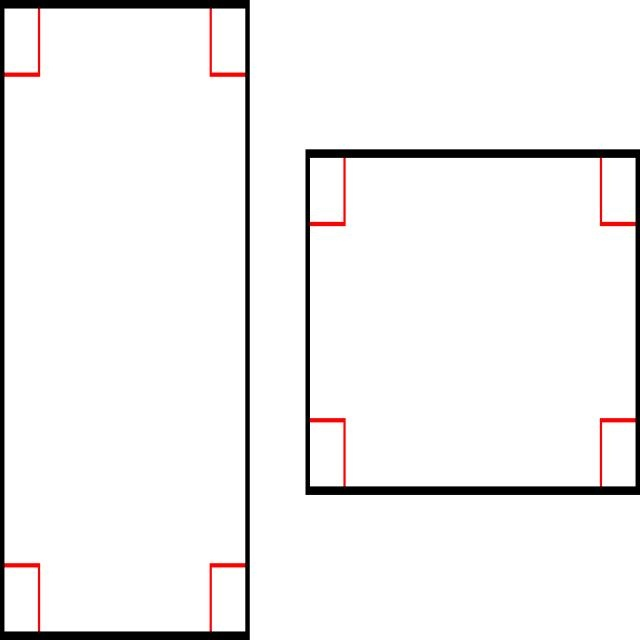

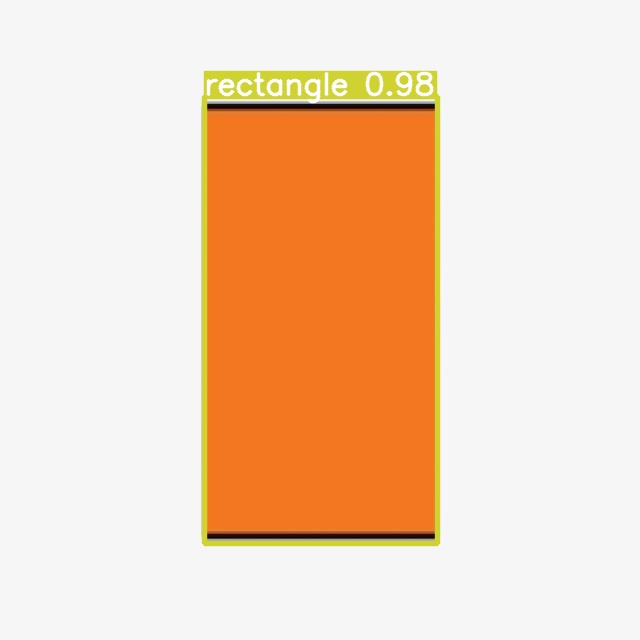

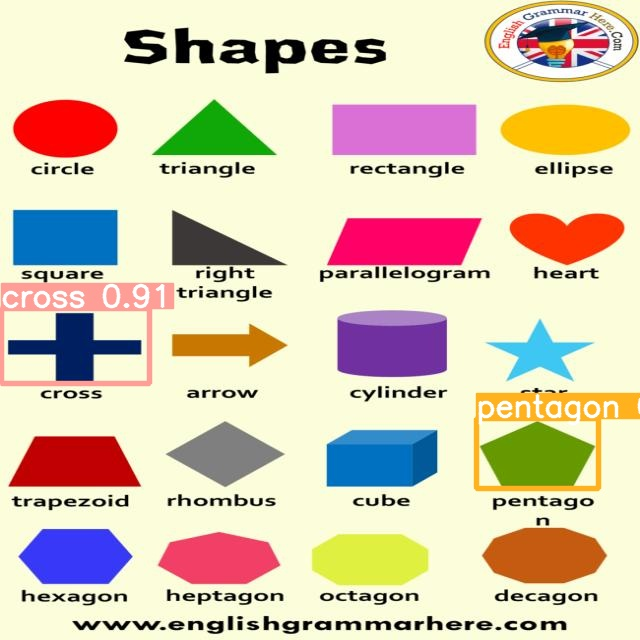

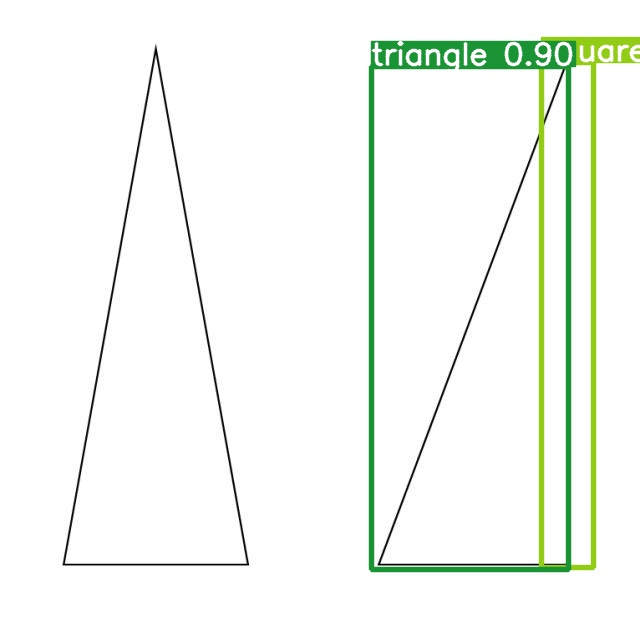

In [9]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=350))                    #previewing the results of the tests
      print("\n")

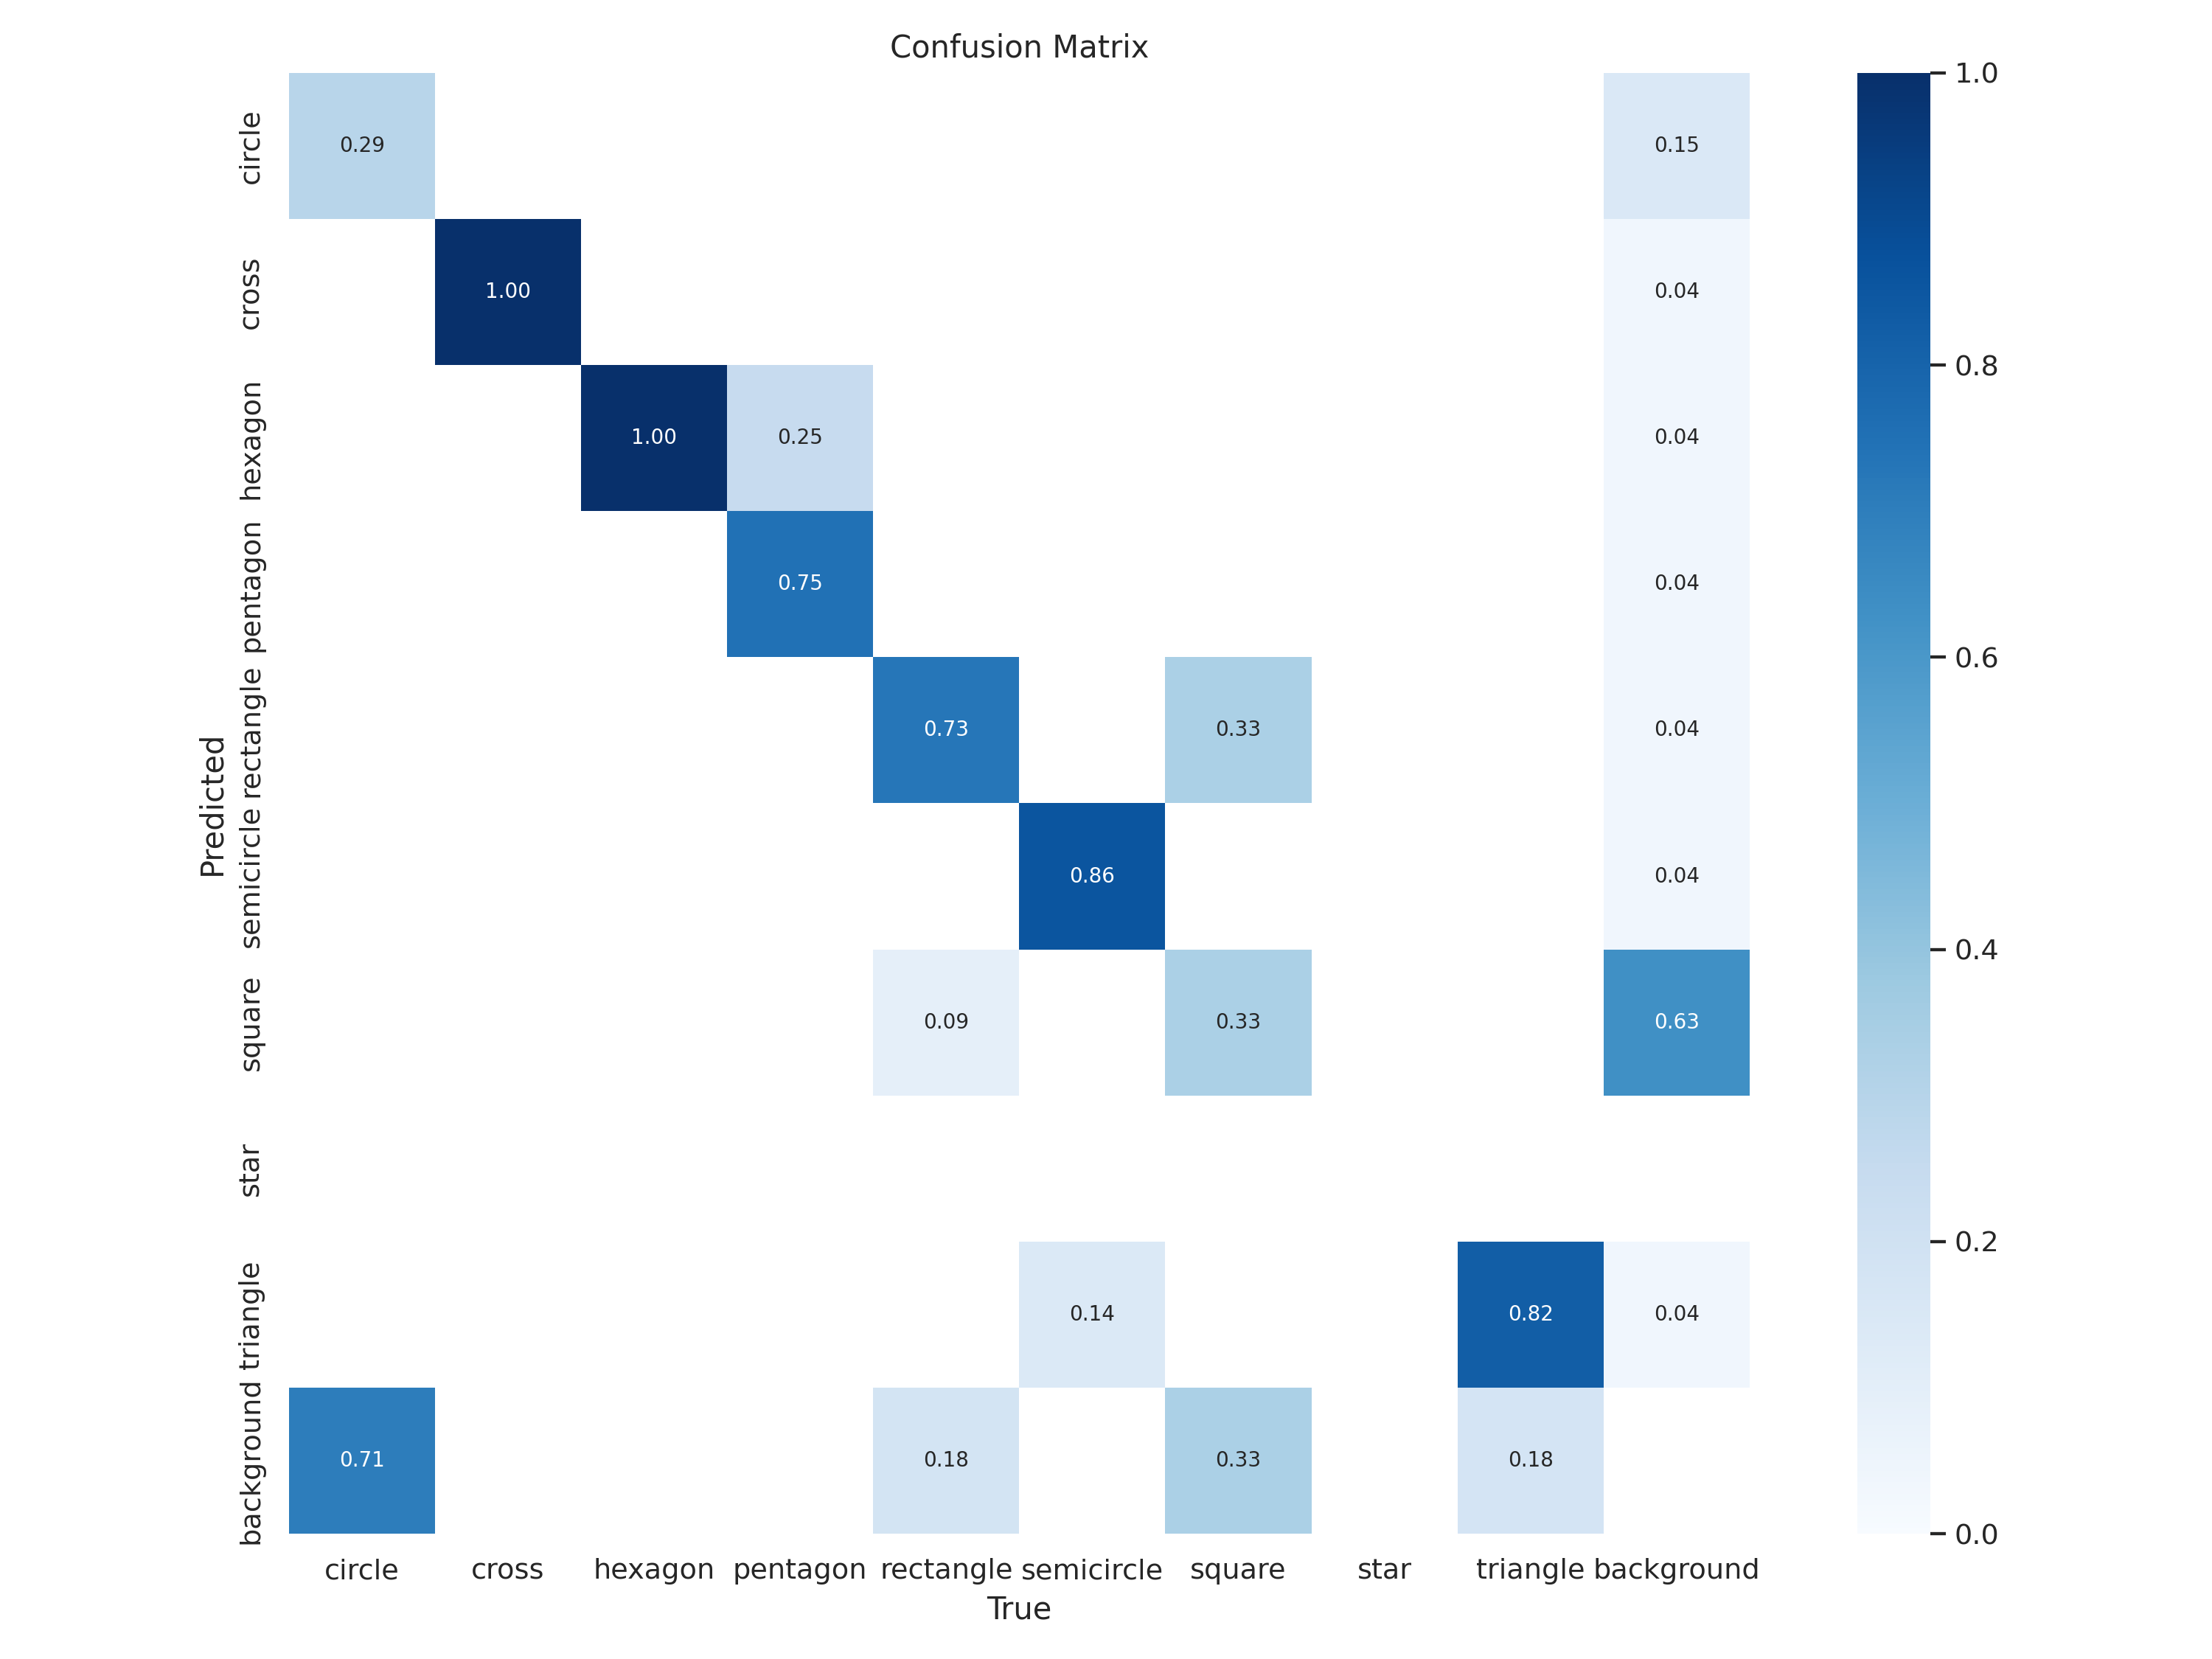

In [6]:
Image(filename="/content/runs/detect/train/confusion_matrix.png", width=600)